## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [7]:
# import the necessary packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [8]:
# read in the data, print the first 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [9]:
print('The number of rows is: {}'.format(df.shape[0]))

The number of rows is: 294478


c. The number of unique users in the dataset.

In [10]:
print('The number of unique users is: {}'.format(df['user_id'].nunique()))

The number of unique users is: 290584


d. The proportion of users converted.

In [11]:
print('The proportion of converted users is: {}'format(df['converted'].mean())

SyntaxError: invalid syntax (<ipython-input-11-27bdf3b253e2>, line 1)

e. The number of times the `new_page` and `treatment` don't line up.

In [12]:
# use shape to find dimensions of both possible kinds of mismatch
treatment_mismatch = df.query("group == 'treatment' & landing_page == 'old_page'").shape[0]
control_mismatch = df.query("group == 'control' & landing_page == 'new_page'").shape[0]
total_mismatch = treatment_mismatch + control_mismatch
print('The number of mismatches is: {}'.format(total_mismatch))

The number of mismatches is: 3893


f. Do any of the rows have missing values?

In [13]:
#sum null values across all columns
df.isnull().sum()
print('No cells have missing values')

No cells have missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# create a copy of the data frame, that drops all mis-matched treatments and pages
df2 = df
df2.drop(df.query("group == 'treatment' & landing_page == 'old_page'").index, inplace = True)
df2.drop(df.query("group == 'control' & landing_page == 'new_page'").index, inplace = True)

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
print('The number of unique user ids is: {}'.format(df2['user_id'].nunique()))

The number of unique user ids is: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
print('The repeated user id is: {}'.format(df2['user_id'].value_counts().idxmax()))

The repeated user id is: 773192


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.duplicated('user_id', keep = False)].index

Int64Index([1899, 2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
#filter down dataframe by disregarding the dupe value marked true
#print the value counts of each user as a sanity check, and to make sure the row was dropped
df2 = df2[df2.duplicated('user_id')!=True]
print(df2['user_id'].value_counts().max())
print(df2.shape[0])

1
290584


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
print('The probability of an individual converting regardless of the page they receive is: {}'.format(df2.converted.mean()))

The probability of an individual converting regardless of the page they receive is: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
print('The probability of an individual converting, given they were in the control group is: {}'.format(df2.groupby(['group'])['converted'].mean()[0]))

The probability of an individual converting, given they were in the control group is: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
print('The probability of an individual converting, given they were in the treatmentgroup is: {}'.format(df2.groupby(['group'])['converted'].mean()[1]))

The probability of an individual converting, given they were in the treatmentgroup is: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [23]:
print('The probability of an individual receiving the new page is: {}'.format((df2[df2['landing_page'] == 'new_page'].shape[0])/(df2.shape[0])))

The probability of an individual receiving the new page is: 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}: p_{old}  >=  p_{new}\\
H_{1}: p_{old}  <  p_{new}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [46]:
p_null = df2['converted'].mean()
print('The conversion rate under the nulll for p_new is: {}'.format(p_null))

The conversion rate under the nulll for p_new is: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [47]:
print('The conversion rate under the nulll for p_new is: {}'.format(p_null))

The conversion rate under the nulll for p_new is: 0.11959708724499628


c. What is $n_{new}$?

In [48]:
n_new = df2.query("group == 'treatment'").shape[0]
print('N_new is: {}'.format(n_new))

N_new is: 145310


d. What is $n_{old}$?

In [50]:
n_old = df2.query("group == 'control'").shape[0]
print('N_old is: {}'.format(n_old))

N_old is: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#generate random string of binomial outcomes that match the aforementioned probabilities under the null
new_page_converted = np.random.binomial(n_new,p_null)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
#generate random string of binomial outcomes that match the aforementioned probabilities under the null
old_page_converted = np.random.binomial(n_old,p_null)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [54]:
#calculate pnew - pold for the sample
print('P_new - P_old is: {}'.format(new_page_converted/n_new - old_page_converted/n_old))

P_new - P_old is: 0.001862937939469067


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
#store results of simulation loop in p_diff
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_null)
    old_page_converted = np.random.binomial(n_old,p_null)
    p_diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(new_page_converted/n_new - old_page_converted/n_old)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

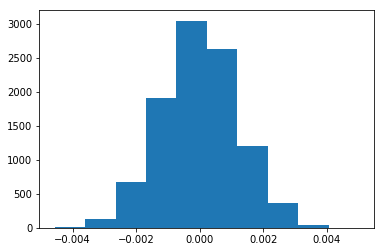

In [32]:
plt.hist(p_diffs);

The plot appears as expected under the null hypothesis, ie. the difference between p_new and p_old is 0, therefore the generated histogram should be centered around 0 also.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [56]:
#calculate the means for the treatment and control groups in the simulation, print
#the proportion that are above the sample difference
sample_diff = df2.groupby(['group'])['converted'].mean()[1] - df2.groupby(['group'])['converted'].mean()[0]
print('The proportion of simulated p_diffs greater than the sample diff is: {}'.format((sample_diff < p_diffs).mean()))

The proportion of simulated p_diffs greater than the sample diff is: 0.9032


k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

Part j calculated the p-value of the sample mean under the null. For this experiment, the p-value being 0.98 means that we fail to reject the null hypothesis as the p-value is larger than alpha = .05. This means that the new page is equivalent or worse than the old page for converting customers.

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm
#calculate the relevant statistics for a z-test (group sizes and conversion rates)
convert_old = df2.groupby(['group'])['converted'].sum()[0]
convert_new = df2.groupby(['group'])['converted'].sum()[1]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#perform, store, and print the results of the proportions z test
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old,n_new], alternative = 'smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score represents the number of standard deviations away from the mean (under the null) the sample mean is. The p-value denotes the probability that there is a result more extreme than the sample value. As it is .9 (ie. 90% can be more extreme) we fail to reject the null hypothesis, similar to our results under simulation.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#create both the intercept and ab_page dummies
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
#check the new variable by inpsecting the first five rows.
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [41]:
#store the regression
ab_logit = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
#display the summary
ab_logit.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        01:15:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with ab_page is 0.190, notably larger than the standard cut-off of alpha = 0.05, indicating that ab_page is not significantly correlated with conversion in the regression. 

The null hypothesis differs from our previous results as the null hypothesis under regression is that the coefficient is not different from 0, while the null hypothesis under our simulation and z-test was that the mean difference in treatment was less than or equal to zero.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding extra factors can account for more features in the dataset that may be of interest. Disadvantages include harder to interpret output, loss of degrees of freedom, potential multicollinearity, and depending on the model, noticeably higher computation time for fit.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [57]:
#read in country data
country_df = pd.read_csv('countries.csv')
#create country dummies, where CA is the reference
country_dummy = pd.get_dummies(country_df['country'])
# merge the country and country dummy set
country_df = pd.concat([country_df, country_dummy], axis  = 1)
# use join to merge country dataset and the ab test dataset together
df_final = country_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')
#create a logistic model for conversion with the country factors incorporated
sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page', 'UK', 'US']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        01:38:34   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

It apears that neither the UK or US factors are significant at the alpha = 0.05 level, although the UK factor is close to the cutoff. Both countries have positive coefficients indicating that in the model, being a member of either country raises conversion odds. The treatment factor is still non-significant in the expanded model. Interestingly, the intercept is more negative than the non-factor model, and still significant. As the intercept in this case 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [58]:
#create interaction variables for treatment and country
df_final['trt_UK'] = df_final['ab_page']*df_final['UK']
df_final['trt_US'] = df_final['ab_page']*df_final['US']
#generate the model, with the included terms
sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page', 'UK', 'US','trt_UK', 'trt_US']]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 25 Jun 2018   Pseudo R-squ.:               3.482e-05
Time:                        01:38:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
trt_UK         0.0783      0.057      1.378      0.168      -0.033       0.190
trt_US         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Here we note similar results to the last iteration, except with the interaction terms added. None of the coefficients are significant except for the intercept which on it's own represents members of CA who are in the control group. It does not appear that the addition of countries, treatment, or their interactions have been useful in improving model fit. If we wished to further examine this, we could calculate the LLR between each of the models and the original one with just an intercept and treatment factor.

## Conclusions

After performing simulations to generate a test statistic, using a built in method, and running various regressions, the results for the A/B test seem to indicate that the new page is either equal or possibly worse than the old page. It does not seem worth pursuing the change to better drive conversions. Given the sample size, and the non-significant p-values across the board, it also does not seem worthwhile to run the experiment longer as it would cost resources that could be deployed elsewhere.

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0